In [3]:
# Import All Required Liberies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [13]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [12]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


- Data Preparation

In [16]:
dataset = pd.DataFrame(housing.data , columns=housing.feature_names)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
dataset["price"] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
#data split

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [24]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [26]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

- Train Test Spliting

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=44)

# idhar ham data split kar rhe hai...for training and for testing

In [32]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5567,2.6618,19.0,4.666667,1.142132,2047.0,3.463621,33.88,-118.28
3116,3.9261,12.0,5.657303,1.044944,1027.0,2.884831,35.63,-117.76
4750,2.5320,39.0,3.734257,1.022670,2638.0,3.322418,34.04,-118.32
13963,3.9688,15.0,16.550562,3.078652,622.0,2.329588,34.24,-116.87
2262,1.9575,24.0,4.528424,1.058140,2098.0,2.710594,36.79,-119.83
...,...,...,...,...,...,...,...,...
18528,3.2437,44.0,4.996139,1.038610,645.0,2.490347,36.96,-122.04
20355,1.9811,16.0,6.104730,1.168919,587.0,1.983108,34.19,-118.96
16955,6.0000,40.0,5.990196,1.006536,751.0,2.454248,37.53,-122.30
3491,5.1408,33.0,5.359862,0.913495,881.0,3.048443,34.27,-118.47


In [33]:
y_train

5567     1.797
3116     1.013
4750     1.727
13963    1.828
2262     0.670
         ...  
18528    2.239
20355    1.625
16955    3.842
3491     2.229
14100    1.225
Name: price, Length: 16512, dtype: float64

In [34]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20127,4.4219,34.0,5.850220,1.074890,795.0,3.502203,34.40,-118.98
18256,6.1995,36.0,6.309756,1.014634,1055.0,2.573171,37.38,-122.09
10376,10.1531,2.0,9.906329,1.130380,2985.0,3.778481,33.64,-117.62
4109,6.5533,34.0,6.431154,1.086231,1572.0,2.186370,34.14,-118.39
8169,5.0447,36.0,5.953020,1.003356,784.0,2.630872,33.81,-118.12
...,...,...,...,...,...,...,...,...
2312,3.9032,3.0,5.863330,1.192913,4432.0,2.492688,36.85,-119.74
18574,2.5599,42.0,2.826446,0.966942,2312.0,4.776860,36.91,-121.75
14552,6.4696,10.0,7.217391,0.971014,1700.0,3.519669,32.97,-117.13
1430,4.6375,28.0,6.281780,1.129237,1591.0,3.370763,38.00,-122.02


In [35]:
y_test

20127    3.38100
18256    4.07200
10376    4.84100
4109     5.00001
8169     2.49200
          ...   
2312     1.40800
18574    1.51400
14552    2.49500
1430     1.78200
4977     1.05800
Name: price, Length: 4128, dtype: float64

- Data Standerdization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [43]:
x_train

array([[-6.39313890e-01, -7.70123468e-01, -3.18448077e-01, ...,
         3.12799921e-02, -8.18307745e-01,  6.42275354e-01],
       [ 2.55369484e-02, -1.32842869e+00,  9.00311043e-02, ...,
        -1.86339026e-02,  2.97361003e-05,  9.01327246e-01],
       [-7.07571138e-01,  8.25034301e-01, -7.02917949e-01, ...,
         1.91028816e-02, -7.43488318e-01,  6.22348286e-01],
       ...,
       [ 1.11612791e+00,  9.04792190e-01,  2.27296098e-01, ...,
        -5.57667090e-02,  8.88510430e-01, -1.36039504e+00],
       [ 6.64304894e-01,  3.46486970e-01, -3.26160516e-02, ...,
        -4.52430976e-03, -6.35935392e-01,  5.47621779e-01],
       [-1.22307638e+00,  1.86971194e-01, -9.59981326e-01, ...,
        -9.01614158e-02, -1.34204373e+00,  1.23510564e+00]],
      shape=(16512, 8))

- Model Training

In [47]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression() # here we Created Model
regression.fit(x_train , y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
print("Coefficient: ",regression.coef_)

print("Intercept: ",regression.intercept_)

Coeffiecent:  [ 0.83215514  0.11519221 -0.2633912   0.31621969 -0.00115802 -0.03990048
 -0.90741623 -0.87609073]
Intercept:  2.0677633024467053


- Model Prediction

In [52]:
y_cap = regression.predict(x_test)
print(y_cap)

[2.55823281 3.35684836 4.09751962 ... 2.80867915 2.38870762 1.61280809]


- Model Evaluation

In [54]:
residuals = y_test - y_cap
residuals

20127    0.822767
18256    0.715152
10376    0.743480
4109     1.707415
8169    -0.172330
           ...   
2312    -0.014145
18574   -0.691329
14552   -0.313679
1430    -0.606708
4977    -0.554808
Name: price, Length: 4128, dtype: float64

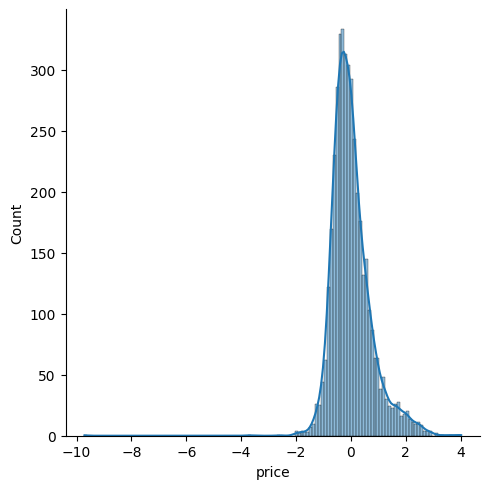

In [56]:
# Normality -> Distribution plot of the above residuals == it should be normally distributed

sns.displot(residuals , kde=True)

- Model Evaluation

In [62]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
print("MSE: ",mean_squared_error(y_test,y_cap))
print("Squred MSE: ",np.sqrt(mean_squared_error(y_test,y_cap)))
print("MAE: ",mean_absolute_error(y_test,y_cap))
print("R2 Score: ",r2_score(y_test,y_cap))

MSE:  0.5347838950335048
Squred MSE:  0.7312892006815804
MAE:  0.5278504031670419
R2 Score:  0.6084415600235555


- R-Squared Vs Adjusted R-Squared

In [64]:
# Save The Model
    # into Pickle File
import pickle
pickle.dump(regression,open("Linear_Regression.pkl" , 'wb'))

In [67]:
# Load Pkl File
regression = pickle.load(open("Linear_Regression.pkl" , 'rb'))

In [68]:
# Now we can use Model(regression)
regression.predict(x_test)

array([2.55823281, 3.35684836, 4.09751962, ..., 2.80867915, 2.38870762,
       1.61280809], shape=(4128,))